#**Rotina de análise da Matriz Energética Brasileira**

O script vai realizar uma análise detalhada dos bancos de dados retirados de "data worldbank" e gerar gráficos explicativos, um relatório e enviará um email com estes compílados a quem interesse.

Bancos de dados utilizados:

https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart

https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?end=2018&start=1960&view=chart

https://data.worldbank.org/indicator/EN.ATM.METH.KT.CE?view=chart

https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC?view=chart

https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS?view=chart

https://data.worldbank.org/indicator/EN.ATM.NOXE.KT.CE?view=chart

******https://data.worldbank.org/indicator

In [93]:
# conecta o colab ao google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
# Cronometra o tempo de execução do programa
import time
start_script = time.time()

In [95]:
# Importa as bibliotecas necessárias
from datetime import datetime, date
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


In [96]:
# Instala pacotes de barra de progresso, para melhor visualização do progresso do script
#!pip install tqdm
#!pip install progressbar

In [97]:
# importa o pacote de barra de progresso, para melhor visualização do progresso do script
from tqdm import tqdm

##**Biblioteca de Funções**

In [98]:
def ler_csv(name_csv):
  df = pd.read_csv(bd_local + '/' + name_csv, header=0, sep = ',', skiprows=4, decimal='.')
  return df

In [99]:
def formatar_titulo(text):
  words = text.split(" ")
  total_string = ""
  for counter, word in enumerate(words):
    if counter>0 and counter % 5 == 0:
      total_string +="\n{}".format(word)
    else:
      total_string +=" {}".format(word)
  return total_string.lstrip()

##**Imputs do Script**

In [100]:
# Nome dos bancos de dados:
BD_POP = 'API_SP.POP.TOTL_DS2_en_csv_v2_3731322.csv'
BD_CO2 = 'API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3731558.csv'
BD_MET = 'API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3733252.csv'
BD_NOX = 'API_EN.ATM.NOXE.KT.CE_DS2_en_csv_v2_3733279.csv'
BD_EPC = 'API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3733258.csv' # Eletric Power Consumpion per Capita (KWh)
BD_REC = 'API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_3753692.csv'

# Nome da pasta que estão os Bancos de Dados (BDs):
bd_local = '/content/drive/MyDrive/..Python Codes/Projeto Dashboard Matriz Energética/BD'

In [101]:
##rascunho,
# dfr = ler_csv(BD_POP)
# dfr

In [102]:
#rascunho
# indexBR = dfr.index[dfr['Country Name'] == 'Aruba']   # find BR index
# n = indexBR[0]
# df = dfr.iloc[n,:]
# df 

##**Rotina de Execução**

In [103]:
# Lista de bancos de dados:
BD_list = [BD_POP,BD_CO2,BD_MET,BD_NOX,BD_EPC,BD_REC]
BD_df_list = []

for n in tqdm(BD_list):
  df = ler_csv(n)                                        # le o banco de dados respectivo
  indexBR = df.index[df['Country Name'] == 'Brazil'][0]  # encontra o index referente ao brasil
  df_BRtrat = pd.DataFrame(df.iloc[indexBR, :])          # separa a linha de dados do brasil em um dataframe separado
  df_BRtrat = df_BRtrat.transpose()                      # transpõe o dataframe para facilitara a visualização
  BD_df_list.append(df_BRtrat)                           # adiciona o dataframe criado à uma lista 


df = pd.DataFrame(BD_df_list[0])                      # inicia um dataframe único
for n in range(1, len(BD_df_list)):                   # laço de mesclagem dos bancos de dados
  df = pd.merge(df , BD_df_list[n], how = 'outer')    # mesclagem dos bancos de dados


df.drop('Country Name',  axis='columns', inplace=True)    # remove colunas desnecessárias
df.drop('Country Code',  axis='columns', inplace=True)    # remove colunas desnecessárias
df.drop('Indicator Code',  axis='columns', inplace=True)  # remove colunas desnecessárias
df = df.transpose()                                       # transpõe o dataframe para facilitar a visualização

new_header = df.iloc[0]                                   #grab the first row for the header
df = df[1:]                                               #take the data less the header row
df.columns = new_header                                   #set the header row as the df header

df                                                        # imprime a tabela/dataframe gerado(a)



100%|██████████| 6/6 [00:00<00:00, 60.01it/s]


Indicator Name,"Population, total",CO2 emissions (metric tons per capita),Methane emissions (kt of CO2 equivalent),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Electric power consumption (kWh per capita),Renewable energy consumption (% of total final energy consumption)
1960,72179235.0,0.649886,NaN,NaN,NaN,NaN
1961,74311338.0,0.662131,NaN,NaN,NaN,NaN
1962,76514329.0,0.701775,NaN,NaN,NaN,NaN
1963,78772647.0,0.70605,NaN,NaN,NaN,NaN
1964,81064572.0,0.699884,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2017,207833825.0,2.164422,421660.0,184380.0,NaN,45.436401
2018,209469320.0,2.041874,416280.0,179200.0,NaN,47.061699
2019,211049519.0,NaN,NaN,NaN,NaN,NaN
2020,212559409.0,NaN,NaN,NaN,NaN,NaN


In [104]:
for col in df.columns:
    print(col)

Population, total
CO2 emissions (metric tons per capita)
Methane emissions (kt of CO2 equivalent)
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
Electric power consumption (kWh per capita)
Renewable energy consumption (% of total final energy consumption)


## **Análise dos dados**

In [105]:
df['CH4 emissions (metric tons per capita)'] = 1000 * df['Methane emissions (kt of CO2 equivalent)'] / df['Population, total']
df['NO2 emissions (metric tons per capita)'] = 1000 * df['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'] / df['Population, total']

df['Total Polutant emissions (metric tons per capita of CO2 equivalent)'] = df['CO2 emissions (metric tons per capita)'] +\
                                                                            df['CH4 emissions (metric tons per capita)'] +\
                                                                            df['NO2 emissions (metric tons per capita)'] 

## **Geração de Gráficos**

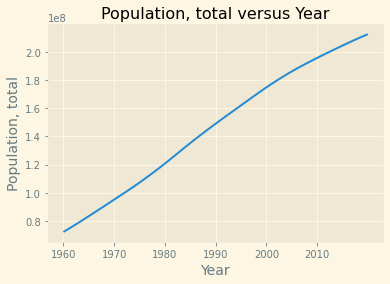

<Figure size 2400x1800 with 0 Axes>

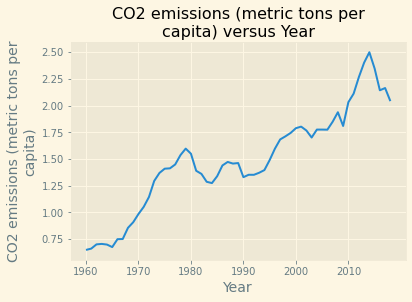

<Figure size 2400x1800 with 0 Axes>

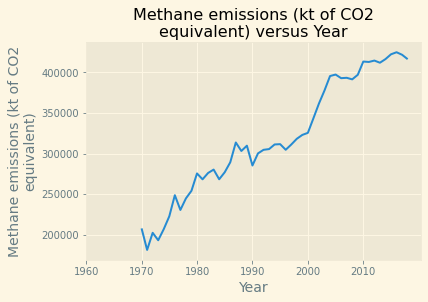

<Figure size 2400x1800 with 0 Axes>

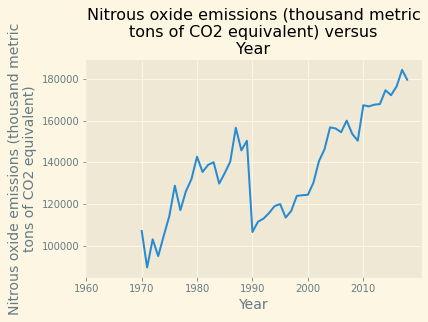

<Figure size 2400x1800 with 0 Axes>

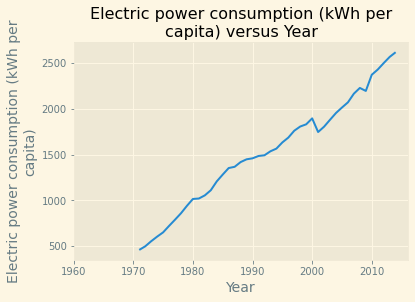

<Figure size 2400x1800 with 0 Axes>

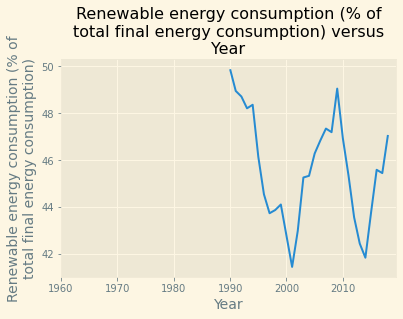

<Figure size 2400x1800 with 0 Axes>

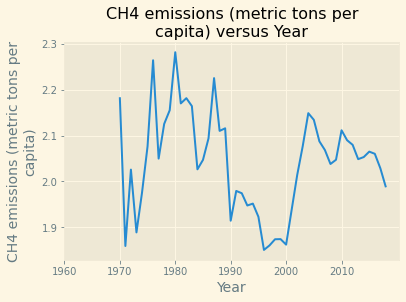

<Figure size 2400x1800 with 0 Axes>

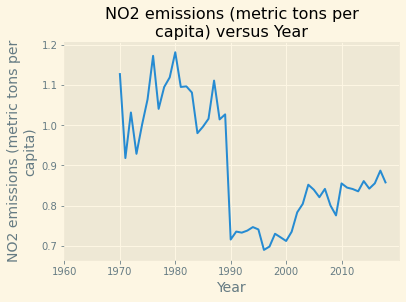

<Figure size 2400x1800 with 0 Axes>

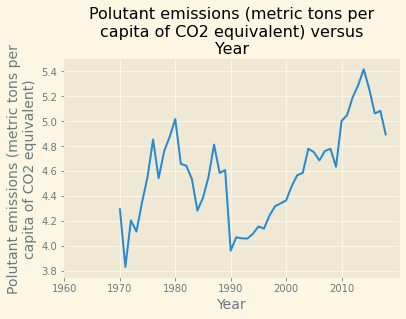

<Figure size 2400x1800 with 0 Axes>

In [106]:
# copia eixo de tempo (anos):
df['ano (str)'] = df.index

# Converte eixo de tempo (string) em inteiros ou NaN:
df['ano (int)'] = pd.to_numeric(df['ano (str)'], errors='coerce').fillna(0).astype('int')
df['ano (int)'].replace(0, np.nan, inplace=True)

# Remove index NaN:
df['ano (int)'].dropna()

# Encontra os limites da faixa de valores do eixo X:
xi = df['ano (int)'][0]
xf = df['ano (int)'][-2]

# plota as Colunas do Dataframe em função do ano:
for n in df.columns:
  if ((n == 'ano (int)') | (n == 'ano (str)')) == 1:
    pass
  else:
    with plt.style.context('Solarize_Light2'):
      plt.plot(df['ano (int)'], df[n] , linewidth=2.0)

      plt.title(formatar_titulo(n + ' versus Year'))

      plt.xlabel('Year', fontsize=14)
      plt.ylabel( formatar_titulo(n) , fontsize=14)
      
      time_step = 10 # years
      plt.xticks(list(range(int(xi), int(xf), time_step)))  # passo de tempo

      figure(figsize=(8, 6), dpi=300)

    img_local = bd_local.replace('/BD','/Images')
    plt.savefig(os.path.join( img_local , n  + ' versus Year'), dpi=300, bbox_inches='tight')
    plt.show()


In [107]:
end_script = time.time()
print('Tempo do script {:.2f} segundos'.format((end_script - start_script)))

Tempo do script 8.20 segundos
